In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fatal-police-shootings-data.csv',parse_dates=['date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8643 entries, 0 to 8642
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          8643 non-null   int64         
 1   date                        8643 non-null   datetime64[ns]
 2   threat_type                 8612 non-null   object        
 3   flee_status                 7491 non-null   object        
 4   armed_with                  8433 non-null   object        
 5   city                        8595 non-null   object        
 6   county                      3787 non-null   object        
 7   state                       8643 non-null   object        
 8   latitude                    7674 non-null   float64       
 9   longitude                   7674 non-null   float64       
 10  location_precision          7674 non-null   object        
 11  name                        8085 non-null   object      

In [4]:
df.columns

Index(['id', 'date', 'threat_type', 'flee_status', 'armed_with', 'city',
       'county', 'state', 'latitude', 'longitude', 'location_precision',
       'name', 'age', 'gender', 'race', 'race_source',
       'was_mental_illness_related', 'body_camera', 'agency_ids'],
      dtype='object')

In [5]:
# Convert string dates to datetime objects
start_pre_covid = pd.to_datetime('2016-01-01')
end_pre_covid = pd.to_datetime('2019-06-30')
start_post_covid = pd.to_datetime('2020-01-01')
end_post_covid = pd.to_datetime('2023-06-30')

In [6]:
df_pre_covid = df[(df['date'] >= start_pre_covid) & (df['date'] <= end_pre_covid)].copy()
df_post_covid = df[(df['date'] >= start_post_covid) & (df['date'] <= end_post_covid)].copy()

In [48]:
# state = df['state']
# gender = df['gender']
# date = df['date']
df_pre_covid['year'] = df_pre_covid['date'].dt.year
df_post_covid['year'] = df_post_covid['date'].dt.year

In [53]:
# df_post_covid

In [119]:
population_data = pd.read_csv('Population 2016-2023.csv')

In [120]:
population_data['state'] = population_data['state'].str.lstrip('.')

In [121]:
# Dictionary of state names to abbreviations
state_to_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

In [122]:
population_data['state'] = population_data['state'].replace(state_to_abbr)

In [123]:
# Columns for each period
cols_2016_2019 = ['state'] + [str(year) for year in range(2016, 2020)]
cols_2020_2023 = ['state'] + [str(year) for year in range(2020, 2024)]

## Calculating the annual shooting incidents per capita for each state befpre COVID

In [197]:
# Splitting the data
data_2016_2019 = population_data[cols_2016_2019]
data_2020_2023 = population_data[cols_2020_2023]

In [149]:
# Convert from wide format to long format
melted_df = data_2016_2019.melt(id_vars=['state'], 
                    value_vars=['2016', '2017', '2018', '2019'], 
                    var_name='year', 
                    value_name='population')

In [150]:
# Remove commas and convert 'population' to integer
melted_df['population'] = melted_df['population'].str.replace(',', '').astype(int)
data_2016_2019 = melted_df.sort_values(by='state')
data_2016_2019['year'] = data_2016_2019['year'].astype(int)

In [151]:
# Count incidents by state and year
incident_counts = df_pre_covid.groupby(['state', 'year']).size().reset_index(name='incidents')

In [152]:
# print(incident_counts.head())
# print(data_2016_2019.head())
print(incident_counts.dtypes)
print(data_2016_2019.dtypes)

state        object
year          int64
incidents     int64
dtype: object
state         object
year           int64
population     int64
dtype: object


In [188]:
# Merge with population data
# merged_data = pd.merge(incident_counts, data_2016_2019, on=['state', 'year'])
merged_data = pd.merge(data_2016_2019, incident_counts, on=['state', 'year'], how='outer')


In [189]:
merged_data['incidents'] = merged_data['incidents'].fillna(0).astype(int)

In [190]:
# merged_data[merged_data['state'] == 'DC']

In [191]:
merged_data

,state,year,population,incidents
0,AK,2017,740983,8
1,AK,2016,742575,7
2,AK,2018,736624,7
3,AK,2019,733603,5
4,AL,2018,4891628,13
...,...,...,...,...
199,WV,2017,1818683,11
200,WY,2017,579994,1
201,WY,2016,585243,2
202,WY,2018,579054,4


In [192]:
merged_data['incidents_per_100K'] = (merged_data['incidents'] / merged_data['population']) * 100000

In [174]:
# merged_data

In [193]:
# merged_data = merged_data.sort_values(by='incidents_per_100K', ascending=False)

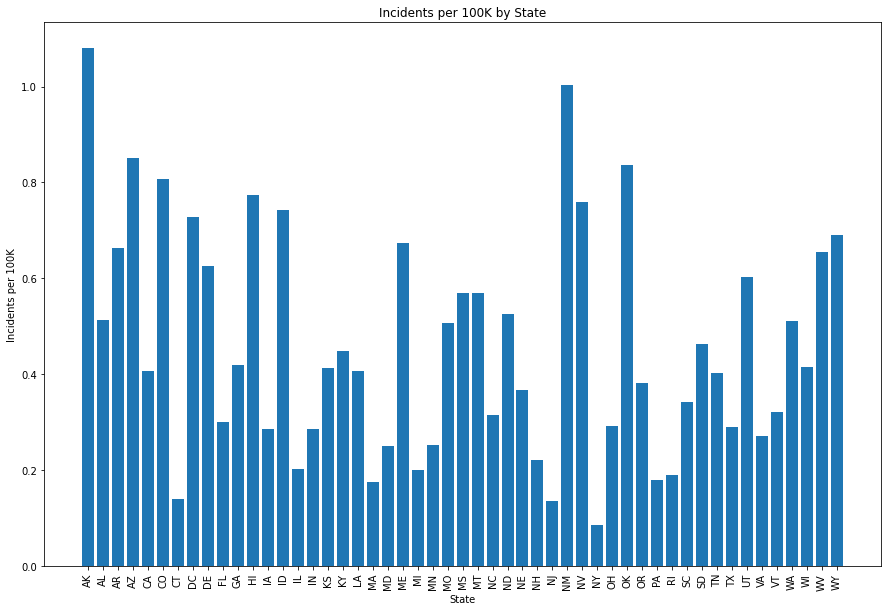

In [194]:
plt.figure(figsize=(15, 10))  # Adjust as needed
plt.bar(merged_data['state'], merged_data['incidents_per_100K'])
plt.xticks(rotation=90)  # Rotates the state names so they don't overlap
plt.ylabel('Incidents per 100K')
plt.xlabel('State')
plt.title('Incidents per 100K by State')
plt.show()

/tmp/ipykernel_17361/2810463471.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='incidents_per_100K', hue='year', data=merged_data, ci=None)


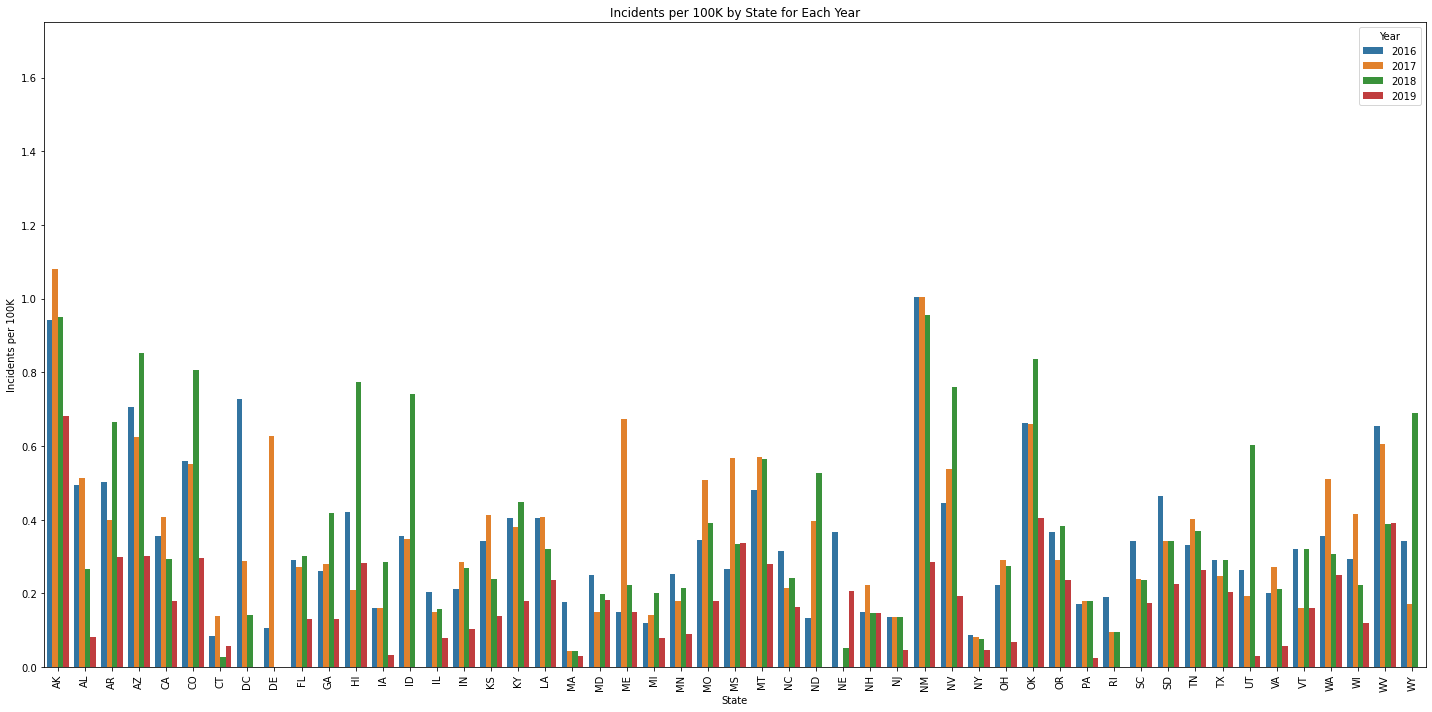

In [208]:
plt.figure(figsize=(20, 10))

# Using seaborn's barplot with hue as 'year' creates a grouped bar chart.
sns.barplot(x='state', y='incidents_per_100K', hue='year', data=merged_data, ci=None)

plt.xticks(rotation=90)
plt.ylabel('Incidents per 100K')
plt.xlabel('State')
plt.title('Incidents per 100K by State for Each Year')
plt.legend(title='Year')

plt.tight_layout()
plt.ylim(0, 1.75)
plt.show()


## Calculating the annual shooting incidents per capita for each state after COVID

In [198]:
# Convert from wide format to long format
melted_df_post = data_2020_2023.melt(id_vars=['state'], 
                    value_vars=['2020', '2021', '2022', '2023'], 
                    var_name='year', 
                    value_name='population')

In [199]:
# Remove commas and convert 'population' to integer
melted_df_post['population'] = melted_df_post['population'].str.replace(',', '').astype(int)
data_2020_2023 = melted_df_post.sort_values(by='state')
data_2020_2023['year'] = data_2020_2023['year'].astype(int)

In [200]:
# Count incidents by state and year
incident_counts_post = df_post_covid.groupby(['state', 'year']).size().reset_index(name='incidents')

In [201]:
print(incident_counts_post.dtypes)
print(data_2020_2023.dtypes)

state        object
year          int64
incidents     int64
dtype: object
state         object
year           int64
population     int64
dtype: object


In [202]:
merged_data_post = pd.merge(data_2020_2023, incident_counts_post, on=['state', 'year'], how='outer')
merged_data_post['incidents'] = merged_data_post['incidents'].fillna(0).astype(int)

In [203]:
merged_data_post['incidents_per_100K'] = (merged_data_post['incidents'] / merged_data_post['population']) * 100000

In [204]:
merged_data_post

,state,year,population,incidents,incidents_per_100K
0,AK,2021,734182,7,0.953442
1,AK,2020,732923,9,1.227960
2,AK,2022,733583,5,0.681586
3,AK,2023,733583,2,0.272634
4,AL,2022,5074296,20,0.394143
...,...,...,...,...,...
199,WV,2021,1785526,6,0.336035
200,WY,2021,579483,3,0.517703
201,WY,2020,577605,1,0.173129
202,WY,2022,581381,10,1.720042


In [205]:
# merged_data_post = merged_data_post.sort_values(by='incidents_per_100K', ascending=False)

In [206]:
merged_data_post

,state,year,population,incidents,incidents_per_100K
0,AK,2021,734182,7,0.953442
1,AK,2020,732923,9,1.227960
2,AK,2022,733583,5,0.681586
3,AK,2023,733583,2,0.272634
4,AL,2022,5074296,20,0.394143
...,...,...,...,...,...
199,WV,2021,1785526,6,0.336035
200,WY,2021,579483,3,0.517703
201,WY,2020,577605,1,0.173129
202,WY,2022,581381,10,1.720042


/tmp/ipykernel_17361/2337220890.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='state', y='incidents_per_100K', hue='year', data=merged_data_post, ci=None)


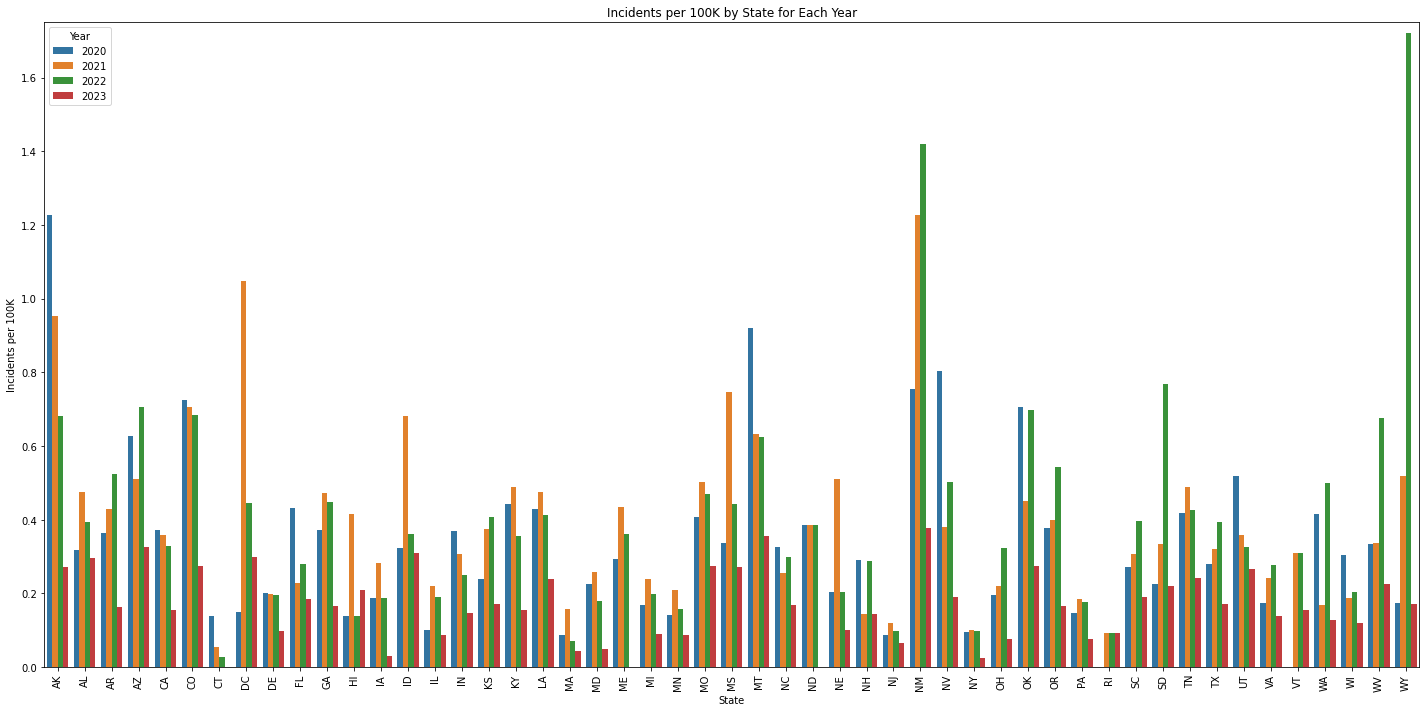

In [209]:
plt.figure(figsize=(20, 10))

# Using seaborn's barplot with hue as 'year' creates a grouped bar chart.
sns.barplot(x='state', y='incidents_per_100K', hue='year', data=merged_data_post, ci=None)

plt.xticks(rotation=90)
plt.ylabel('Incidents per 100K')
plt.xlabel('State')
plt.title('Incidents per 100K by State for Each Year')
plt.legend(title='Year')

plt.tight_layout()
plt.ylim(0, 1.75)
plt.show()
